Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

# cats vs dogs classification using cnn (CampusX)

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#download the kaggle.json from kaggle account

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# using generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int', # assigning cats 0 and dogs 1
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     36992     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 128)     512       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 92s 130ms/step - loss: 1.8454 - accuracy: 0.5483 - val_loss: 0.7664 - val_accuracy: 0.5346
Epoch 2/10
625/625 [==============================] - 82s 131ms/step - loss: 0.6555 - accuracy: 0.5889 - val_loss: 0.6123 - val_accuracy: 0.6522
Epoch 3/10
625/625 [==============================] - 83s 132ms/step - loss: 0.6150 - accuracy: 0.6461 - val_loss: 1.8623 - val_accuracy: 0.5712
Epoch 4/10
625/625 [==============================] - 85s 135ms/step - loss: 0.5495 - accuracy: 0.7081 - val_loss: 0.8900 - val_accuracy: 0.6566
Epoch 5/10
625/625 [==============================] - 84s 135ms/step - loss: 0.4810 - accuracy: 0.7634 - val_loss: 0.5147 - val_accuracy: 0.7688
Epoch 6/10
625/625 [==============================] - 85s 136ms/step - loss: 0.4310 - accuracy: 0.7959 - val_loss: 0.4357 - val_accuracy: 0.8028
Epoch 7/10
625/625 [==============================] - 82s 130ms/step - loss: 0.3755 - accuracy: 0.8237 - val_loss: 0.4644 - val_ac

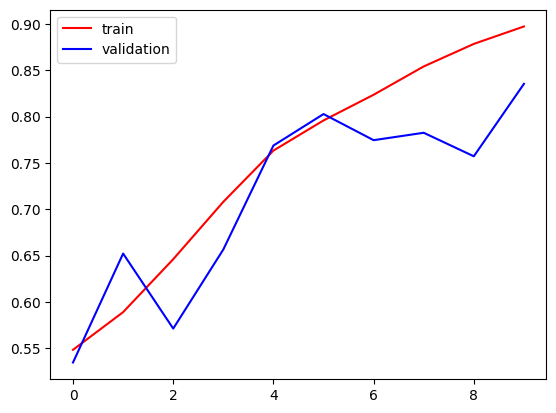

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Prediction for cat

In [12]:
import cv2

In [19]:
test_img_cat = cv2.imread('/content/test/cats/cat.10.jpg')
test_img_cat = test_img_cat.astype('float32') / 255.0

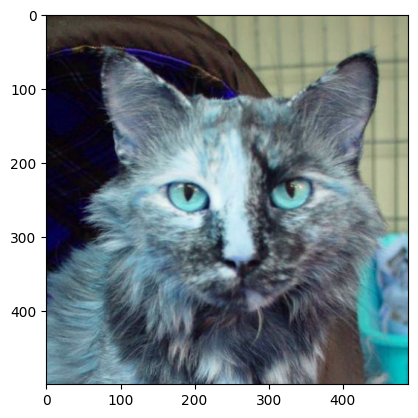

In [20]:
plt.imshow(test_img_cat)

In [21]:
test_img_cat.shape

(499, 489, 3)

In [22]:
test_img_cat = cv2.resize(test_img_cat,(256,256))  # resizing
test_input_cat = test_img_cat.reshape((1,256,256,3))  # only  one image in batch so converting into a 4d tensor

In [43]:
prediction = model.predict(test_input_cat)

1/1 [==============================] - 0s 18ms/step


In [44]:
threshold = 0.5

# Classify
if prediction > threshold:
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")

Predicted class: Cat


##Prediction for dog

In [35]:
test_img_dog = cv2.imread('/content/test/dogs/dog.100.jpg')
test_img_dog = test_img_dog.astype('float32') / 255.0

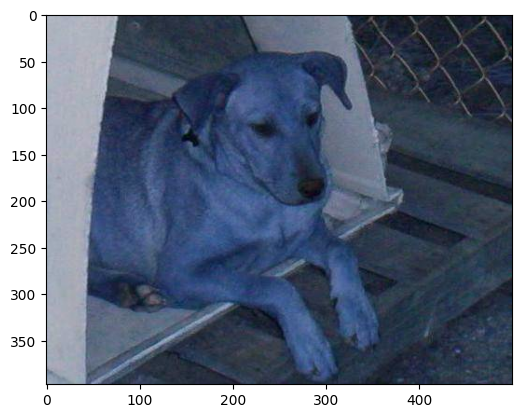

In [36]:
plt.imshow(test_img_dog)

In [37]:
test_img_dog.shape

(397, 500, 3)

In [38]:
test_img_dog = cv2.resize(test_img_dog,(256,256))  # resizing
test_input_dog = test_img_dog.reshape((1,256,256,3))  # only  one image in batch so converting intio a 4d tensor

1/1 [==============================] - 0s 18ms/step


array([[0.8885977]], dtype=float32)

In [41]:
prediction = model.predict(test_input_dog)

1/1 [==============================] - 0s 20ms/step


In [42]:
threshold = 0.5

# Classify
if prediction > threshold:
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")

Predicted class: Dog
